#  This is The Answer of 4th question by Soheil Hekmat


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import os
os.chdir('D:\\Courses\\University\\Term 7\\Applied Machine Learning\\HW\\HW2\\Exercise-4')


# first we read our data

In [31]:
df = pd.read_csv("Concrete_Data.csv")
# df = data_frame
# take a look at the dataset
df.head()

,Cem,BFS,FA,Wat,Sup,CA,FA.1,Ag,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Data Exploration

Let's first have a descriptive exploration on our data.

In [32]:
# summarize the data
df.describe()

,Cem,BFS,FA,Wat,Sup,CA,FA.1,Ag,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [33]:
# checking if we have NAN or null
df.isnull().sum()

Cem     0
BFS     0
FA      0
Wat     0
Sup     0
CA      0
FA.1    0
Ag      0
CMS     0
dtype: int64

In [34]:
df.shape

(1030, 9)

# features correlation check

In [36]:
# now we wanna find out which features are most important 
correlation = df.corr()
correlation

,Cem,BFS,FA,Wat,Sup,CA,FA.1,Ag,CMS
Cem,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BFS,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FA,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Wat,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Sup,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA.1,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Ag,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: >

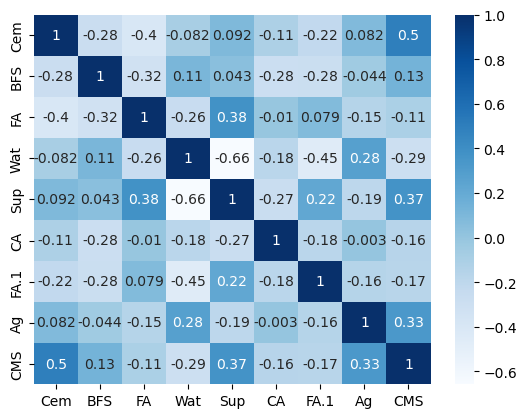

In [38]:
# a better way to understand by plot
sns.heatmap(correlation,cmap='Blues',annot=True)

 based on the heatmap the best feature to model is first one 'cem'

So we use scikit learn for modeling based on linear regression

In [59]:
# data preprocessing for sklearn
# all features are assigned to x and last column is assigned to y
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy().reshape(-1, 1)
#X.shape
#Y.shape

In [79]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing

# data normalizing

In [94]:
scalar = preprocessing.StandardScaler().fit(X)
X = scalar.transform(X.astype(float))

now we will split our datas into train and test datas 70/30

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=4)
# print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
# now for first part of the question we just wanna use one feature with
# the most coorelation which we found in prior sections 'cem'
cem_train = X_train[:, 0].reshape(-1, 1)


In [82]:
regr1 = linear_model.LinearRegression()
regr1.fit (cem_train, Y_train)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

Coefficients:  [[8.25130609]]
Intercept:  [36.10202903]


here we plot the result by scatter plot

Text(0, 0.5, 'Strentgh')

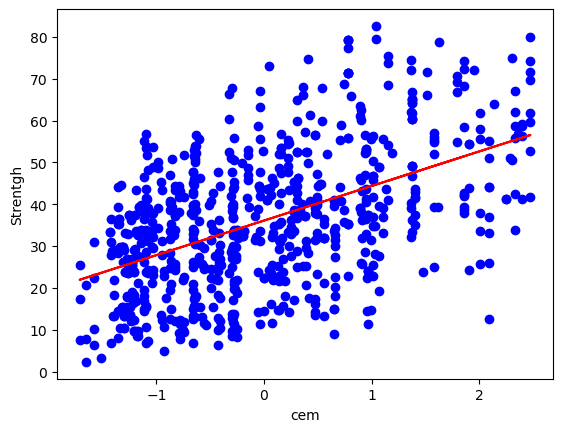

In [83]:
plt.scatter(cem_train, Y_train,  color='blue')
plt.plot(cem_train, regr1.coef_[0][0]*cem_train + regr1.intercept_[0], '-r')
plt.xlabel("cem")
plt.ylabel("Strentgh")

# Evaluation 

we use r2-score and rmse from sklearn metrics to see how good we did our job

In [86]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [87]:
cem_test = X_test[:,0].reshape(-1,1)
yHat = regr1.predict(cem_test)
print('RMSE For our model is: %.2f Mpa' % (mean_squared_error(Y_test , yHat))**0.5)
print('R2 score For our model is: %.2f' % (r2_score(Y_test , yHat)))

RMSE For our model is: 15.36 Mpa
R2 score For our model is: 0.20


# we start the second part of the question

as we see in the heatmap cem sup and ag are 3 features we want because they're more related

In [88]:
cem_sup_ag_train = X_train[:,[0,4,7]]
# print(cem_sup_ag_train.shape)
regr2 = linear_model.LinearRegression()
regr2.fit (cem_sup_ag_train, Y_train)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [[7.17037457 6.38832226 5.86105184]]
Intercept:  [35.99331524]


In [89]:
cem_sup_ag_test = X_test[:,[0,4,7]]
yHat2 = regr2.predict(cem_sup_ag_test)
print('RMSE For our model is: %.2f Mpa' % (mean_squared_error(Y_test , yHat2))**0.5)
print('R2 score For our model is: %.2f' % (r2_score(Y_test , yHat2)))

RMSE For our model is: 12.55 Mpa
R2 score For our model is: 0.47
